In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [2]:
conn = sqlite3.connect("data_16_17.db")
with conn:
    df = pd.read_sql('SELECT * FROM Data', conn,parse_dates="('DateTime', 'Unnamed: 0_level_1')", coerce_float=True, index_col="('DateTime', 'Unnamed: 0_level_1')")
df = df[:'2017-08-31']
df.head()

,"('CHEMBUR', 'TEMP')","('CHEMBUR', 'RG')","('CHEMBUR', 'RH')","('CHEMBUR', 'WS')","('CHEMBUR', 'WD')","('CHEMBUR', 'PA')","('BHANDUP', 'TEMP')","('BHANDUP', 'RG')","('BHANDUP', 'RH')","('BHANDUP', 'WS')",...,"('BORIWALI', 'HR')","('BORIWALI', 'WS')","('BORIWALI', 'WD')","('BORIWALI', 'PA')","('NAVI MUMBAI', 'TEMP')","('NAVI MUMBAI', 'RG')","('NAVI MUMBAI', 'HR')","('NAVI MUMBAI', 'WS')","('NAVI MUMBAI', 'WD')","('NAVI MUMBAI', 'PA')"
"('DateTime', 'Unnamed: 0_level_1')",,,,,,,,,,,,,,,,,,,,,
2016-01-01 02:00:00,24.64,0.0,56.37,NaN,360.00,1013.9,23.16,0.0,50.11,0.46,...,72.79,0.31,195.34,1014.6,20.98,0.0,63.51,0.01,43.35,1013.1
2016-01-01 03:00:00,24.32,0.0,55.94,0.01,118.21,1013.8,21.26,0.0,60.05,0.10,...,74.78,0.25,198.63,1014.5,20.04,0.0,68.96,0.03,2.28,1012.7
2016-01-01 04:00:00,24.74,0.0,56.32,0.03,274.47,1013.6,21.07,0.0,60.14,0.30,...,78.80,0.26,197.61,1014.3,19.55,0.0,71.64,0.01,49.62,1012.3
2016-01-01 05:00:00,24.34,0.0,55.53,0.18,354.41,1013.3,22.67,0.0,47.19,0.91,...,76.43,0.42,193.77,1014.2,19.04,0.0,74.71,0.04,10.33,1012.0
2016-01-01 06:00:00,23.93,0.0,54.94,0.17,5.25,1013.8,22.67,0.0,48.71,1.07,...,70.65,0.30,190.75,1014.7,18.36,0.0,79.10,0.03,344.49,1012.4


In [3]:
shift_days = 5
shift_steps = shift_days * 24  # Number of Quater-Hours.

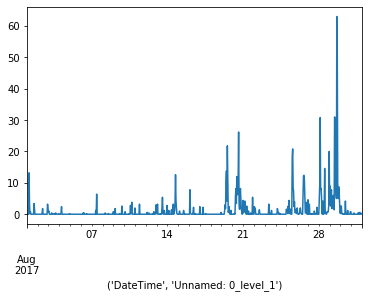

In [4]:
df["('CHEMBUR', 'RG')"]['2017-08-01':'2017-10-01'].plot()

In [5]:
ndf = df.interpolate(method='time')
ndf = ndf.drop_duplicates()
ndf = ndf.dropna()
ndf = ndf.interpolate(method='time')
ndf

,"('CHEMBUR', 'TEMP')","('CHEMBUR', 'RG')","('CHEMBUR', 'RH')","('CHEMBUR', 'WS')","('CHEMBUR', 'WD')","('CHEMBUR', 'PA')","('BHANDUP', 'TEMP')","('BHANDUP', 'RG')","('BHANDUP', 'RH')","('BHANDUP', 'WS')",...,"('BORIWALI', 'HR')","('BORIWALI', 'WS')","('BORIWALI', 'WD')","('BORIWALI', 'PA')","('NAVI MUMBAI', 'TEMP')","('NAVI MUMBAI', 'RG')","('NAVI MUMBAI', 'HR')","('NAVI MUMBAI', 'WS')","('NAVI MUMBAI', 'WD')","('NAVI MUMBAI', 'PA')"
"('DateTime', 'Unnamed: 0_level_1')",,,,,,,,,,,,,,,,,,,,,
2016-01-06 13:00:00,31.06,0.0,62.69,0.23,334.90,1012.1,30.41,0.0,29.73,0.90,...,35.67,0.19,251.82,1009.0,30.97,0.0,35.88,0.15,207.67,1016.1
2016-01-06 14:00:00,31.90,0.0,63.82,0.14,265.27,1010.2,31.38,0.0,27.48,1.22,...,32.45,0.59,236.32,1006.6,31.72,0.0,33.88,0.71,224.96,1015.2
2016-01-06 15:00:00,31.93,0.0,64.01,0.32,129.85,1009.1,31.99,0.0,26.23,1.11,...,35.77,0.52,264.42,1005.6,32.22,0.0,31.74,0.97,231.67,1014.1
2016-01-06 16:00:00,30.78,0.0,62.70,0.96,107.17,1008.8,31.16,0.0,33.24,1.70,...,35.82,0.18,304.55,1005.1,32.34,0.0,30.59,0.82,232.43,1013.7
2016-01-06 17:00:00,30.04,0.0,61.86,0.85,116.57,1009.2,30.47,0.0,34.32,1.35,...,36.59,0.23,244.61,1005.2,31.42,0.0,37.25,0.52,238.52,1013.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 19:00:00,26.13,0.6,87.82,0.29,146.32,1002.0,23.84,3.8,99.64,3.98,...,100.00,0.52,214.61,1003.7,27.31,0.0,80.09,0.61,173.18,1006.5
2017-08-31 20:00:00,26.39,0.0,84.95,0.69,139.03,1002.7,23.84,3.8,99.64,3.98,...,99.57,0.22,206.25,1004.6,26.77,0.0,85.14,0.66,173.82,1006.8
2017-08-31 21:00:00,26.31,0.0,85.23,0.40,142.79,1003.4,23.84,3.8,99.64,3.98,...,100.00,0.13,213.07,1005.3,26.40,0.0,87.18,0.38,174.14,1007.3


In [6]:
# TARGET DATAFRAME (RAINFALL)
r_targets = ["('CHEMBUR', 'RG')",
"('BHANDUP', 'RG')",
"('BKC', 'RG')",
"('COLABA', 'RG')",
"('ANDHERI', 'RG')",
"('MALAD', 'RG')",
"('MAZAGOAN', 'RG')",
"('WORLI', 'RG')",
"('BORIWALI', 'RG')",
"('NAVI MUMBAI', 'RG')"]
rdf = ndf[r_targets]

In [7]:
df_targets = rdf.shift(-shift_steps)

In [8]:
df_targets.columns

Index(['('CHEMBUR', 'RG')', '('BHANDUP', 'RG')', '('BKC', 'RG')',
       '('COLABA', 'RG')', '('ANDHERI', 'RG')', '('MALAD', 'RG')',
       '('MAZAGOAN', 'RG')', '('WORLI', 'RG')', '('BORIWALI', 'RG')',
       '('NAVI MUMBAI', 'RG')'],
      dtype='object')

In [9]:
df_targets.head(10)

,"('CHEMBUR', 'RG')","('BHANDUP', 'RG')","('BKC', 'RG')","('COLABA', 'RG')","('ANDHERI', 'RG')","('MALAD', 'RG')","('MAZAGOAN', 'RG')","('WORLI', 'RG')","('BORIWALI', 'RG')","('NAVI MUMBAI', 'RG')"
"('DateTime', 'Unnamed: 0_level_1')",,,,,,,,,,
2016-01-06 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
x_data = ndf.values[0:-shift_steps]
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (14363, 60)


In [11]:
y_data = df_targets.values[:-shift_steps]
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (14363, 10)


In [12]:
num_data = len(x_data)
num_data

14363

In [13]:
train_split = 0.7

In [14]:
num_train = int(train_split * num_data)
num_train

10054

In [15]:
num_test = num_data - num_train
num_test

4309

In [16]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

14363

In [17]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

14363

In [18]:
num_x_signals = x_data.shape[1]
num_x_signals

60

In [19]:
num_y_signals = y_data.shape[1]
num_y_signals

10

In [20]:
x_train

array([[3.1060e+01, 0.0000e+00, 6.2690e+01, ..., 1.5000e-01, 2.0767e+02,
        1.0161e+03],
       [3.1900e+01, 0.0000e+00, 6.3820e+01, ..., 7.1000e-01, 2.2496e+02,
        1.0152e+03],
       [3.1930e+01, 0.0000e+00, 6.4010e+01, ..., 9.7000e-01, 2.3167e+02,
        1.0141e+03],
       ...,
       [2.1150e+01, 0.0000e+00, 4.8630e+01, ..., 3.0000e-02, 1.0513e+02,
        1.0097e+03],
       [2.3120e+01, 0.0000e+00, 4.2360e+01, ..., 2.8000e-01, 1.1694e+02,
        1.0117e+03],
       [2.6350e+01, 0.0000e+00, 3.1510e+01, ..., 2.5000e-01, 1.4614e+02,
        1.0133e+03]])

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 1164.5


In [23]:
x_scaler = MinMaxScaler()

In [24]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [25]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000009


In [26]:
x_test_scaled = x_scaler.transform(x_test)


In [27]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [28]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(10054, 60)
(10054, 10)


In [29]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [30]:
batch_size = 32

In [31]:
sequence_length = 24 * 4 * 4
sequence_length

384

In [32]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [33]:
x_batch, y_batch = next(generator)

In [34]:
print(x_batch.shape)
print(y_batch.shape)

(32, 384, 60)
(32, 384, 10)


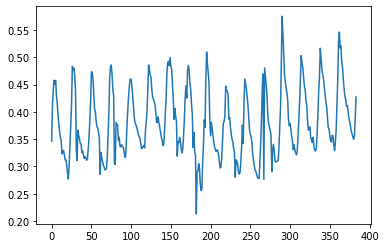

In [35]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

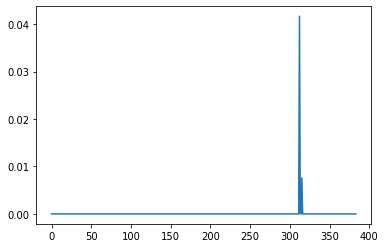

In [36]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [37]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [38]:
model = Sequential()


In [39]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [40]:
model.add(GRU(units=256,
              return_sequences=True))

In [41]:
model.add(Dense(128, activation='relu'))

In [42]:
model.add(Dense(64, activation='relu'))

In [43]:
model.add(Dense(num_y_signals, activation='sigmoid'))


In [44]:
warmup_steps = 100

In [45]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [46]:
optimizer = RMSprop(lr=1e-3)

In [47]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [48]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru (CuDNNGRU)         (None, None, 512)         881664    
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, None, 256)         591360    
_________________________________________________________________
dense (Dense)                (None, None, 128)         32896     
_________________________________________________________________
dense_1 (Dense)              (None, None, 64)          8256      
_________________________________________________________________
dense_2 (Dense)              (None, None, 10)          650       
Total params: 1,514,826
Trainable params: 1,514,826
Non-trainable params: 0
_________________________________________________________________


In [50]:
path_checkpoint = 'checkpoints/be_project_R_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [51]:
callbacks = [callback_checkpoint,]

In [ ]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [52]:
# %%script false
model.fit_generator(generator=generator,
                    epochs=2,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/2
  1/100 [..............................] - ETA: 40:52 - loss: 0.0020
Epoch 00001: val_loss improved from inf to 0.00197, saving model to checkpoints/be_project_R_checkpoint.keras
100/100 [==============================] - 70s 696ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 2/2
  1/100 [..............................] - ETA: 20s - loss: 0.0020
Epoch 00002: val_loss did not improve from 0.00197
100/100 [==============================] - 17s 173ms/step - loss: 0.0010 - val_loss: 0.0020


In [53]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [54]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 195ms/sample - loss: 0.0020


In [55]:
print("loss (test-set):", result)

loss (test-set): 0.0019661481492221355


In [56]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(r_targets)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        plt.tick_params(axis='both', which='major', labelsize=18)
        plt.tick_params(axis='both', which='minor', labelsize=8)
        
        # Plot grey box for warmup-period.
        if train:
            p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.xlabel(f'Time in hours from {rdf.iloc[start_idx].name}', fontsize=20)
        plt.ylabel(r_targets[signal], fontsize=20)
        plt.legend()
        plt.show()

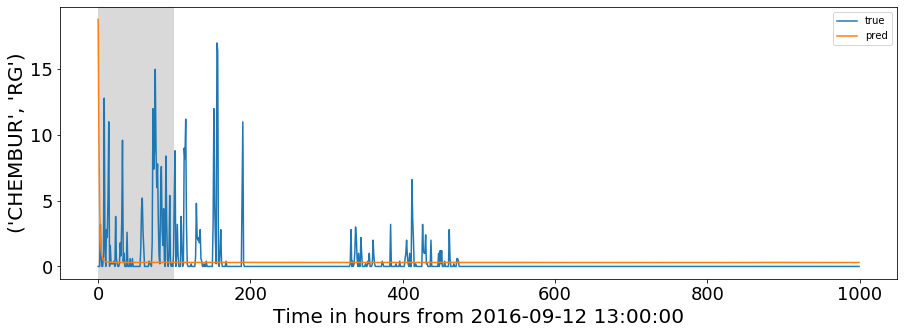

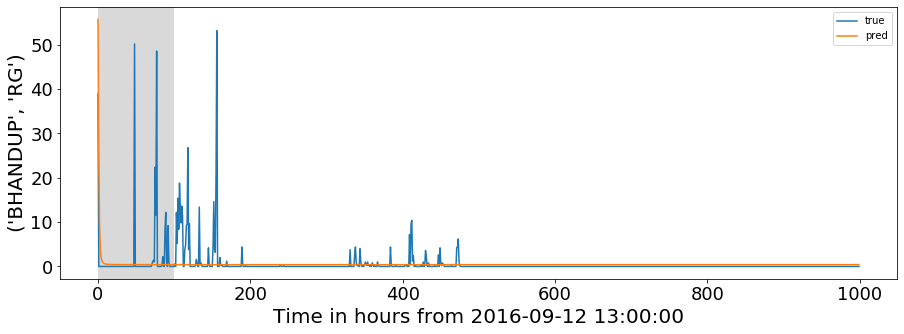

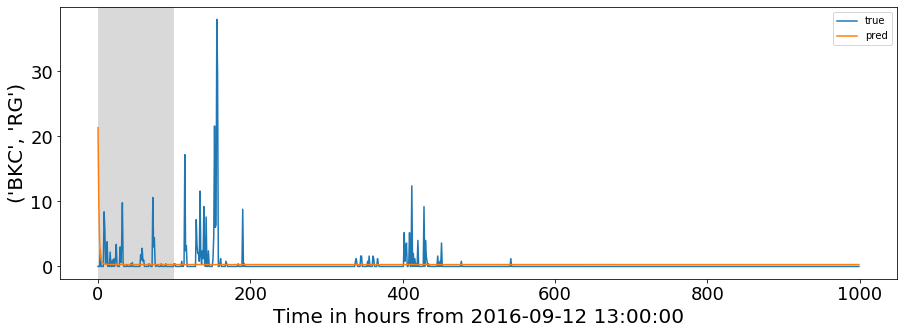

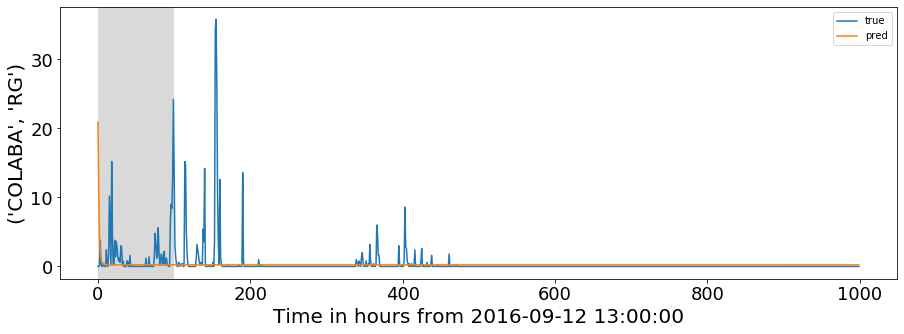

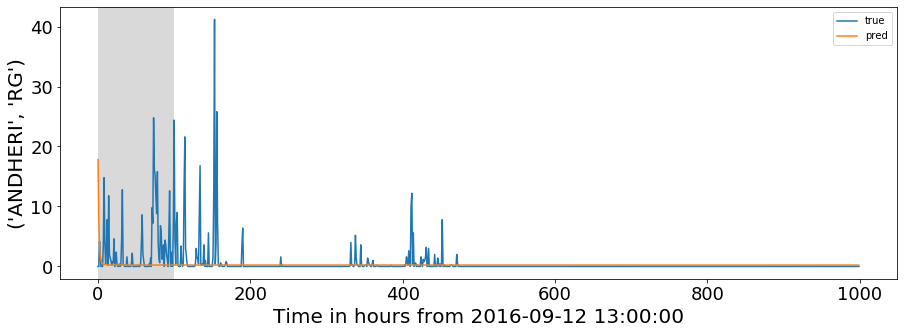

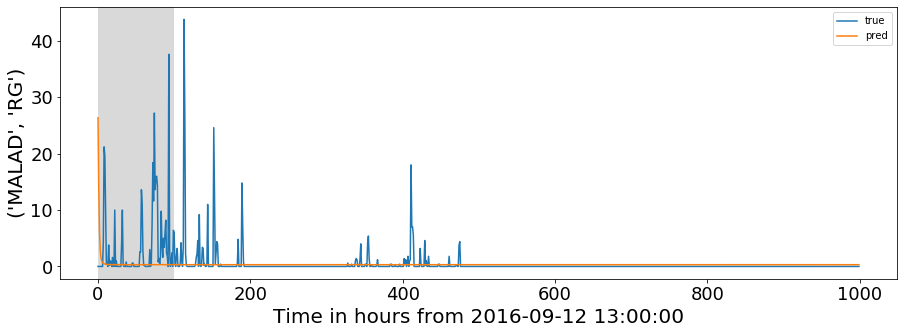

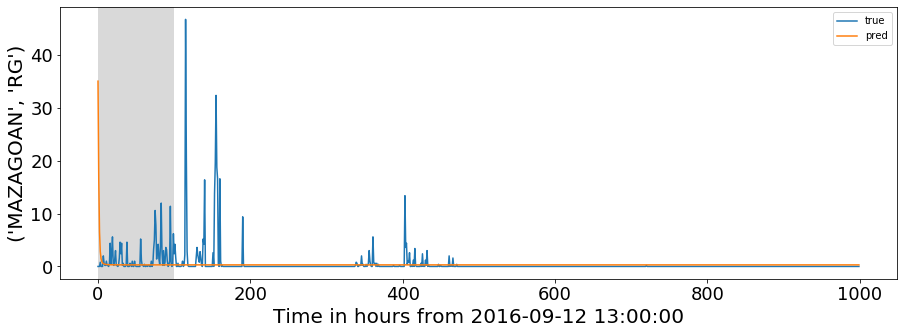

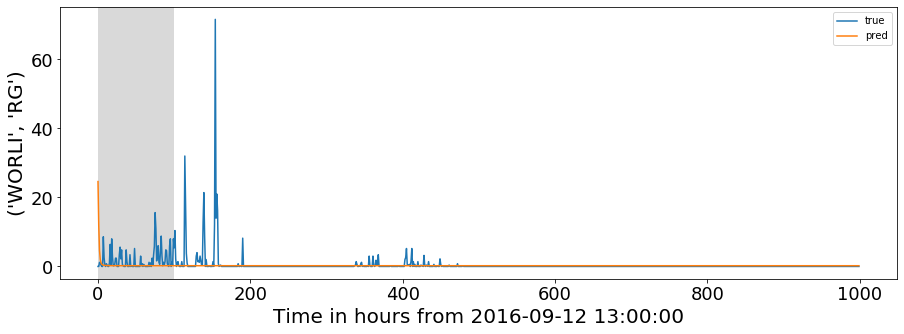

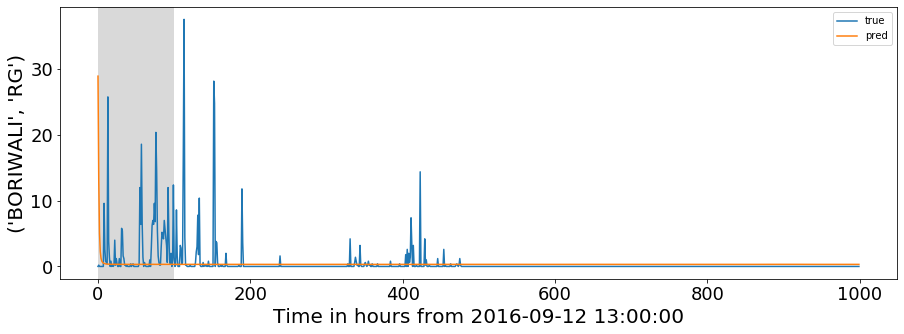

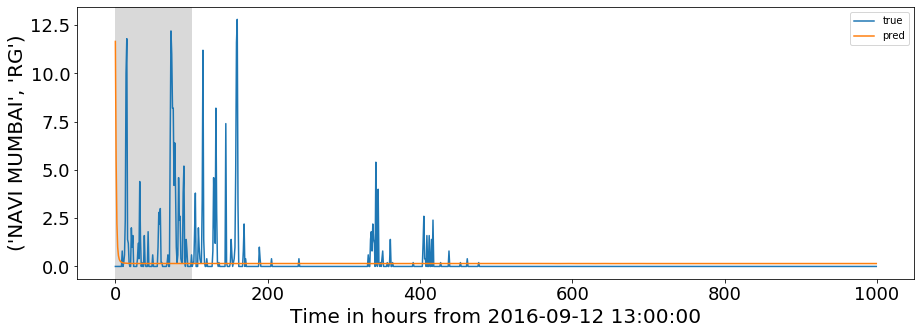

In [75]:
plot_comparison(start_idx=6000, length=1000, train=True)

In [58]:
x = np.expand_dims(x_test_scaled, axis=0)
y_pred = model.predict(x)
y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])

In [59]:
y_pred_rescaled = y_pred_rescaled.round()

In [60]:
y_test

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 3.8, 0. , ..., 0. , 0. , 0. ],
       [0. , 3.8, 0. , ..., 0. , 0.2, 0. ],
       [0.2, 3.8, 0. , ..., 0. , 0. , 0. ]])

In [61]:
error = np.abs(y_pred_rescaled - y_test )

In [62]:
total = error.shape[0]

In [63]:
correct = np.sum(error<1, axis=0)

In [64]:
usable = np.sum(error<2, axis=0)

In [65]:
correct_acc = correct/total*100

In [66]:
usable_acc = usable/total*100

In [67]:
correct_acc_df = pd.DataFrame(correct_acc, index=r_targets)

In [68]:
usable_acc_df = pd.DataFrame(usable_acc, index=r_targets)

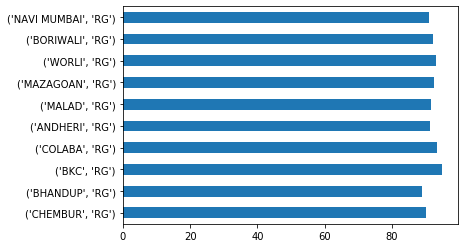

In [69]:
correct_acc_df.plot.barh(legend=False)

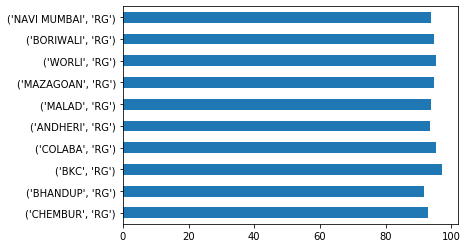

In [70]:
usable_acc_df.plot.barh(legend=False)

In [71]:
total_elements = error.shape[0] * error.shape[1]

In [72]:
np.sum(correct) / total_elements

0.918705035971223

In [73]:
np.sum(usable) / total_elements

0.9428405662566721